## Add package to python path and import function (s)

In [1]:
import sys
import os

# Manually set the parent directory path
notebook_dir = os.getcwd()  # This gets the current working directory of the notebook
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the parent directory to the system path
sys.path.insert(0, parent_dir)

#import an example function from package 
from flim_processing import generate_small_report_fig,analyze_single_fastflim_channel

## Upload the image from path containing fast flim data and fluorescence intensity as separate chanels

In [2]:
from pathlib import Path
data_image = Path(r"G:\SP8_FLIM\0_Workflow_OPTIM\5HT\2023-02-07\5HT_0\cl1_VMAT_5HT_0\cl1-1.tif")

## Evaluate mean lifetimes from segmented objects (granules)
generate the table, that provides all the results for each indivial object. It also creates report table with a summary per image and analized image, containing result of the segmantation

In [3]:
result_table,report_table,report_multichannel_image = analyze_single_fastflim_channel(data_image)
result_table

,Label,Area,intensity_mean_fluor,mean_tau,min_fluor,min_tau,STD_fluor,STD_tau
19,20,360.0,403.288889,1757.297222,209.0,1413.0,60.955538,143.967813
22,23,71.0,302.591549,1789.253521,273.0,1464.0,23.161757,152.915950
29,30,107.0,397.775701,1821.392523,367.0,1485.0,12.278930,154.082315
31,32,143.0,379.986014,1822.860140,329.0,1489.0,16.771599,140.777144
34,35,55.0,305.436364,1913.636364,266.0,1425.0,15.346618,168.146080
35,36,109.0,325.871560,1838.770642,263.0,1429.0,19.773071,149.730868
43,44,131.0,357.977099,1809.335878,260.0,1413.0,28.325390,144.524417
46,47,50.0,300.720000,1836.720000,114.0,1284.0,52.215339,178.561815
50,51,212.0,312.613208,1878.551887,232.0,1489.0,33.133398,158.998523
60,61,158.0,315.360759,1840.063291,222.0,1544.0,21.503081,150.180047


##  Generate report images to evaluate analisys 
Use a function from module which generates and saves images displaing the input and result from analisys 

In [4]:
name='random_image_name'
generate_small_report_fig(report_multichannel_image,name)

C:\Users\med\mambaforge\envs\napari-flim-phasor-env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\med\mambaforge\envs\napari-flim-phasor-env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


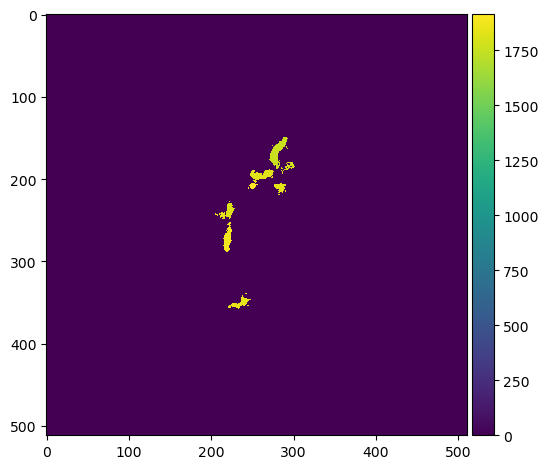

In [6]:
#saving of the output images (th last chanel from the multistack- the rest comes from raw file)
from skimage.io import imsave
from skimage.io import imshow

image_name='param_map_' +data_image.stem+'.tif'

# Save the images
output_image_dir = Path('output_images')
output_image_dir.mkdir(exist_ok=True)

imshow(report_multichannel_image[...,-1])
#imsave(output_image_dir / image_name, report_multichannel_image[...,-1])